In [9]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import pickle

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction Dataset.csv')

In [3]:
# replace values in gender column with 1 and 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

In [4]:
X = df[['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']]
y = df['churn']

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=101)
rfc = RandomForestClassifier(n_estimators=300, max_features=2, min_samples_split=10)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_features=2, min_samples_split=10, n_estimators=300)

In [6]:
ada = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

C:\Users\Baka sheddy.DESKTOP-H27QSPR\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [7]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.80      0.44      0.57       423

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



[[1531   46]
 [ 236  187]]


In [8]:
file_name = 'RetainMe_Model.pkl'
pickle.dump(ada, open(file_name, 'wb'))

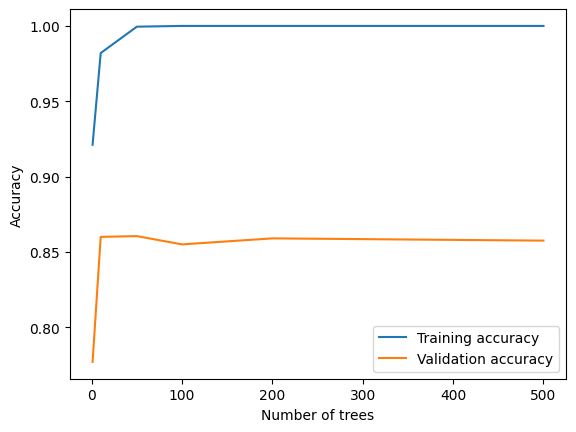

In [11]:
# Define range of number of trees
num_trees = [1, 10, 50, 100, 200, 500]

# Initialize lists to store accuracy scores
train_scores = []
val_scores = []

# Train and evaluate model for each value of num_trees
for n in num_trees:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)
    val_pred = rf.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    val_scores.append(val_acc)

# Plot the complexity curve
plt.plot(num_trees, train_scores, label='Training accuracy')
plt.plot(num_trees, val_scores, label='Validation accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()